In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from konlpy.tag import Twitter 

from wordcloud import WordCloud 
from PIL import Image


In [21]:
review = pd.read_csv('data_bottom_reviews.csv',encoding='cp949') #구매후기 데이터를 pandas의 DataFrame으로 생성

In [7]:
review.head()

,name,size,date,rate,title,text
0,M0096 12.5OZ RIGID DENIM 34/28,34/28,2018.06.22 21:50,50,역시 모디파이드,모디파이드바지는 많이 구매했지만 여전히 가성비 최고인 제품인거 같습니다.\n앞으로도...
1,M0096 12.5OZ RIGID DENIM 33/30,33/30,2018.06.22 10:35,50,재질이 무척좋으뇨,역시 모디파이드는 그냥 가격대비 모든 청바지가 좋은거같아요 사이즈만 잘얼아둔다면 여...
2,M0096 12.5OZ RIGID DENIM 29/30,29/30,2018.06.18 19:00,30,약간 빳빳,움직이기 불편함 그렇게 얇지도 두껍지도 않아서 아무데나 입기 좋아요
3,M0096 12.5OZ RIGID DENIM 31/28,31/28,2018.06.16 15:34,50,후기입니다,사이즈 실수가 없어서 정말 다행입니다\n허벅지 허리 모두 딱맞아요 롤업 잘해서 입으...
4,M0096 12.5OZ RIGID DENIM 28/28,28/28,2018.06.16 14:56,40,빨라요,모디파이드 항상 빠르게 와서 정말 좋은 거 같아요\n근데 이 제품은 색 빠짐이 좀 ...


In [8]:
review.rate.mean()

48.134364741443754

In [3]:
bad = review[review.rate<40]
good = review[review.rate>30] #40,50 점을 good, 0,10,20,30 점을 bad로 구분

In [10]:
print('bad reviews:',len(bad))
print('good reviews:',len(good))

bad reviews: 1420
good reviews: 29347


# 1)코퍼스 생성

In [4]:
bad_corpus = """"""
for i in range(len(bad)):
    bad_corpus+=str(bad.iloc[i,4])+' ' #title
    bad_corpus+=str(bad.iloc[i,5])+'\n' #text


In [12]:
bad_corpus[:1000]

'약간 빳빳 움직이기 불편함 그렇게 얇지도 두껍지도 않아서 아무데나 입기 좋아요\n사이즈가 너무작음 생각보다많이작아서 당황함\n음.. 색상은 화면 보다 좀더 진합니다..생각했던것보다 통이 넓습니다..\n두께도 생각보다 두꺼워 봄이나 여름에 입기에는 많이 더울것같습니다\n그냥입을게요. 얇아서 시원하긴한데 생각보다 신축성이 없네요. 사진으로보면 허벅지 여유있어보이는데 실제로는 더 여유있어요. 그냥 편하게 입으려고요.\n색감이.. 색감이 화면에서 보는거보다 훨씬 연하네요.. 연청잇는데 그거랑 큰 차이가 안나서... 디자인은 좋은데 아쉽네요 180/76 32\n좋은 평가가 많아서 기대하고 샀는데 별루네요... 바지길이가 생각보다 짧고, 한번 세탁했는데 바지가 줄었네요...\n\n환불하기에는 배송료도 들고 해서 그냥 집에서 입으려고 합니다\n생각보다는 별로에요 두께가 얇아서 여름에 시원할꺼같긴한데 비치는거 걱정도되고 그냥 그렇네요\n보통 몇번 빨았는데 보풀이 잘생기네요\n그래도 겨울에 집에서 편하게 잘입었어요 ㅎ\n그냥입을게요. 얇아서 시원하긴한데 생각보다 신축성이 없네요. 사진으로보면 허벅지 여유있어보이는데 실제로는 더 여유있어요. 그냥 편하게 입으려고요.\n그냥입을게요. 얇아서 시원하긴한데 생각보다 신축성이 없네요. 사진으로보면 허벅지 여유있어보이는데 실제로는 더 여유있어요. 그냥 편하게 입으려고요.\n이쁜데 옷은 이쁜데 검수 안하고 보내는거같아요..\n28주문했는ㄷㅔ 29에 28택만 툭 붙여서 보낸거같구요\n예뻐요 길이가 좀 길고 허리가 커서 허리를 한번 접어입으면 딱이에요 한여름에 입기는 더울거같고 봄 가을에 입으면 적당할거 같습니당 무난하니 편하게 입기 좋아요\n사이즈가 너무작음 생각보다많이작아서 당황함\n181 70 m 허리 밴딩이 엄청 쫀쫀해서 넣어입는게 좀 불편해요\n182/67 사이즈M 너무 작습니다. 너무 타이트한 감이 있어요 한치수 크게하면 좋을거 같습니다\n좋은데 아쉽네요 처음엔 잘 입고 다녔는데 세탁 한번 하니까 레깅스...재구매하긴 좀 그렇고 

In [5]:
good_corpus = """"""
for i in range(len(good)):
    good_corpus+=str(good.iloc[i,4])+' ' #title
    good_corpus+=str(good.iloc[i,5])+'\n' #text


In [14]:
good_corpus[:1000]

'역시 모디파이드 모디파이드바지는 많이 구매했지만 여전히 가성비 최고인 제품인거 같습니다.\n앞으로도 많이 구매하겠습니다. 많이 파세요~\n재질이 무척좋으뇨 역시 모디파이드는 그냥 가격대비 모든 청바지가 좋은거같아요 사이즈만 잘얼아둔다면 여기서 구매 많이 하셔도 될거같아요 저는 사이즈미스로 수선비가 많임나오긴하지만 그래도 좋습니다\n후기입니다 사이즈 실수가 없어서 정말 다행입니다\n허벅지 허리 모두 딱맞아요 롤업 잘해서 입으면 대박입니다!\n빨라요 모디파이드 항상 빠르게 와서 정말 좋은 거 같아요\n근데 이 제품은 색 빠짐이 좀 있는 거 같아요\n매일 입어도 안질리는 바지를 샀습니다. 정말 편하고 좋습니다. \n스니커즈나 운동화에 정말 잘 어울리는 바지입니다. 매일 입을 수 있겠습니다.\n맘에들어요!! 색이 예쁘네욯ㅎ 사이즈도 적당한데 물은 좀 빠지네요..\n역시 모디파이드 이쁨 질도 좋고 무릎발사도 안되고\n살짝 롤업하니 참 이뻐용\n173 63\n괜찮아요 핏이랑 색감 괜찮네요. 잘입고 다녔는데 더워져서 옷장에 넣어 놨네요. 가을되면 입어야 겠어요ㅎ\n배송 빠르고 좋고! 데님이 필요햇는데 물이 빠지지않을까 걱정을 많이햇습니다 근데 생각보다 많이 빠지지않앗고 핏이 일단...\n\t\t\t\t\t\t\t\t\t\t more\n티알마킄ㅋㅋㅋㅋㅋ 티알마크 사이즈는 역시 좀 야리야리한 사람한테 더 잘어울리는거같애요 ㅎㅎㅎ 좀 살집이 있으신분...\n편해요! 편해서 아무떄나 입기에도 좋고 알바할떄도 입기 좋네요.\n가격대비 딱 좋아요 이 가격으로 이정도면 꽤 괜찮은거 같다고 생각합니다\n이뻐요\n핏 너무좋아요 핏너무좋고신축성이 조금있어서 편하네요\n재질도 좋고 가성비최고입니다 남자분들 옷장에 하나있으면 코디하기 좋을 것 같네요\n편합니다 상당히 편하지만 최소 20자를 쓰라고 하니 점점 불편해지는군요\n만족합니다 기본적인 슬랙스에 아주 가깝고 핏이 이쁘게 떨어집니다.\n구김이 적고 어디에나 잘어울림\n핏조음 하나 큰걸 시킬까햇는데  그냥 31로 샀는데 꽤나 슬림하게 나옴

# 2)토큰화/토큰 추출

In [6]:
nlp = Twitter() #Twitter의 객체를 생성
type(nlp)

konlpy.tag._twitter.Twitter

In [16]:
nlp.pos(bad_corpus)[0:10] #태깅

[('약간', 'Noun'),
 ('빳빳', 'Noun'),
 ('움직이', 'Verb'),
 ('기', 'Eomi'),
 ('불편함', 'Adjective'),
 ('그렇게', 'Adverb'),
 ('얇지', 'Adjective'),
 ('도', 'Eomi'),
 ('두껍', 'Adjective'),
 ('지도', 'Eomi')]

In [8]:
bad_morphs = nlp.morphs(bad_corpus) #모든 품사의 형태소 추출
good_morphs = nlp.morphs(good_corpus)
bad_morphs[:10]

['약간', '빳빳', '움직이', '기', '불편함', '그렇게', '얇지', '도', '두껍', '지도']

In [9]:
bad_morphs_count = Counter(bad_morphs)
good_morphs_count = Counter(good_morphs)

In [12]:
bad_morphs_count.most_common(10) # 가장많이 등장한 형태소를 랭크, 그러나 어미와 조사 등의 불필요한 정보가 많음

[('요', 1289),
 ('이', 1241),
 ('가', 757),
 ('.', 705),
 ('은', 561),
 ('...', 544),
 ('도', 493),
 ('에', 456),
 ('는', 442),
 ('네요', 412)]

In [ ]:
bad_nouns = nlp.nouns(bad_corpus) # 명사만 추출
good_nouns = nlp.nouns(good_corpus)

In [59]:
bad_nouns[:10] #한국어 형태소 분석기의 한계로 명사아닌 품사도 일부 포함됨

['약간', '빳빳', '무데', '사이즈', '너무', '생각', '음', '색상', '화면', '좀더']

In [19]:
good_nouns[:10]

['역시', '모디', '파', '이드', '모디', '파', '이드', '바지', '구매', '가성']

# 3)불용어처리/랭크

In [13]:
stopwords = ['바지','너무','좀','생각','그냥','옷','조금','구매','제','것','때','음','거','정도','후기','배송','더','요','저','약간','진짜','정말','흠','이','자체','완전','전체','일단','뭐','그','말',
            '왜','듯','뭔가','데','듭니','매우','모디','파','이드','평소','원래','와','오','맘에듭니'] #불용어 리스트를 정의

In [14]:
bad_nouns = [b for b in bad_nouns if not b in stopwords]
good_nouns = [g for g in good_nouns if not g in stopwords]

In [16]:
bad_nouns_count = Counter(bad_nouns)
good_nouns_count = Counter(good_nouns)

In [17]:
bad_nouns_count.most_common(15) #불용어를 제외한 명사의 랭크

[('사이즈', 378),
 ('핏', 330),
 ('허리', 222),
 ('재질', 189),
 ('통', 135),
 ('기장', 126),
 ('느낌', 122),
 ('별로', 119),
 ('사진', 115),
 ('부분', 114),
 ('색', 106),
 ('디자인', 104),
 ('무난', 92),
 ('길이', 84),
 ('모델', 80)]

In [18]:
good_nouns_count.most_common(15)

[('핏', 7460),
 ('사이즈', 7283),
 ('재질', 3604),
 ('허리', 2776),
 ('여름', 2608),
 ('기장', 2598),
 ('가격', 2483),
 ('맘', 2246),
 ('색감', 2245),
 ('마음', 2058),
 ('길이', 1970),
 ('통', 1779),
 ('색상', 1545),
 ('느낌', 1435),
 ('역시', 1428)]

# 4) 결과시각화

In [23]:
import matplotlib as mpl
mpl.matplotlib_fname()

'C:\\Users\\Chankoo\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [22]:
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_list[:5] 

['C:\\WINDOWS\\Fonts\\LTYPEBO.TTF',
 'c:\\windows\\fonts\\nanumbarungothicbold.ttf',
 'C:\\WINDOWS\\Fonts\\NGULIM.TTF',
 'c:\\windows\\fonts\\lfax.ttf',
 'C:\\WINDOWS\\Fonts\\HMKMRHD.TTF']

(-0.5, 960.5, 1299.5, -0.5)

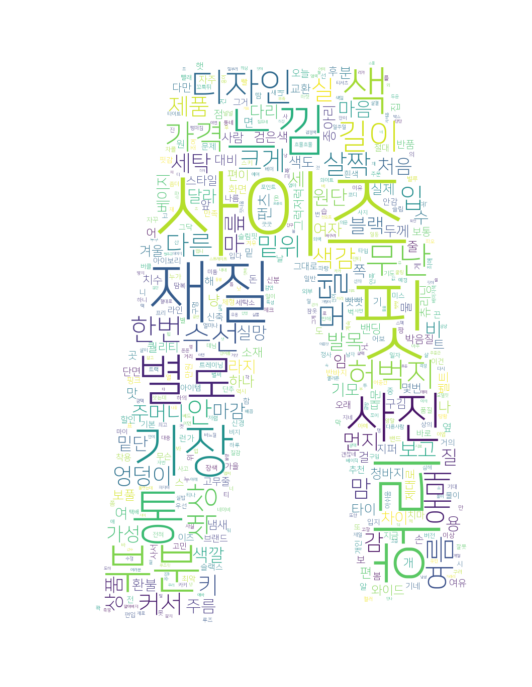

In [19]:
font_path = 'C:\\WINDOWS\\Fonts\\NanumSquareL.ttf' # 그래프 출력을 위해 한글폰트 설정
bottom_mask=np.array(Image.open("bottom.jpg"))
badcloud = WordCloud(font_path=font_path,background_color='white',mask=bottom_mask,max_words=500).generate_from_frequencies(bad_nouns_count)
plt.figure(figsize=(12,12))
plt.imshow(badcloud,interpolation='bilinear')
plt.axis('off')

(-0.5, 960.5, 1299.5, -0.5)

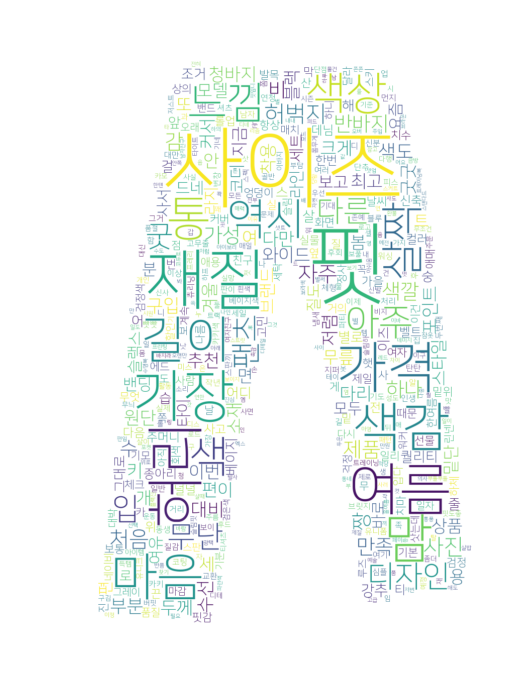

In [20]:
goodcloud = WordCloud(font_path=font_path,background_color='white',mask=bottom_mask,max_words=500).generate_from_frequencies(good_nouns_count)
plt.figure(figsize=(12,12))
plt.imshow(goodcloud,interpolation='bilinear')
plt.axis('off')